## Objetivos:

1. **Carga de Datos**:
   - Importar bibliotecas necesarias (pandas, numpy, seaborn y matplotlib) y cargar las matrices de confusión y los resultados desde archivos en formato Feather.

2. **Preprocesamiento de Nombres de Modelos**:
   - Simplificar los nombres de los modelos para facilitar la visualización extrayendo una parte específica de los nombres originales.

3. **Exploración de Datos**:
   - Mostrar la forma y las columnas del conjunto de datos `res` para verificar su estructura y contenido.

4. **Configuración de Estilo de Visualización**:
   - Establecer un tema para las visualizaciones utilizando la biblioteca Seaborn.

5. **Definición de Función para Gráficos de Métricas**:
   - Crear una función `plot_metric` que genere gráficos de barras para las métricas seleccionadas (F1-SCORE, PRECISION, RECALL) filtrando los datos según la métrica y el conjunto de datos.

6. **Generación de Gráficos de Métricas Globales**:
   - Filtrar y graficar las métricas F1, precisión y recall para el conjunto de prueba, guardando cada gráfico en un archivo.

7. **Definición de Función para Gráficos por Modelo**:
   - Crear una función `plot_model` que genere gráficos de barras para diferentes métricas de un modelo específico (excluyendo SUPPORT), permitiendo la comparación de métricas para diferentes clases.

8. **Generación de Gráficos por Modelo**:
   - Llamar a la función `plot_model` para varios modelos específicos y guardar cada gráfico resultante en un archivo.

Visualización comprensible y comparativa del rendimiento de diferentes modelos de clasificación en base a diversas métricas.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
cmx=confusion_matrixes=pd.read_feather("data/confusion_matrixes.feather")
replaced=cmx["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+") #shorten names to plot easier
cmx["MODEL"]=replaced.where(~replaced.isna(), cmx["MODEL"], axis=0)

In [80]:
res=results=pd.read_feather("data/results.feather")
replaced=res["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+")
res["MODEL"]=replaced.where(~replaced.isna(), res["MODEL"], axis=0)

In [81]:
res.shape

(450, 5)

In [82]:
res.columns

Index(['MODEL', 'SLICE', 'METRIC', 'CLASS', 'VALUE'], dtype='object')

In [83]:
res

,MODEL,SLICE,METRIC,CLASS,VALUE
0,swinv2-base,train,PRECISION,INACTIVE,0.967367
1,swinv2-base,train,RECALL,INACTIVE,0.934370
2,swinv2-base,train,F1-SCORE,INACTIVE,0.950582
3,swinv2-base,train,SUPPORT,INACTIVE,2316.000000
4,swinv2-base,train,PRECISION,WITH_EXPLOSION,0.943775
...,...,...,...,...,...
445,y_median,total,PRECISION,WEIGHTED_AVG,0.205018
446,y_median,total,RECALL,WEIGHTED_AVG,0.452789
447,y_median,total,F1-SCORE,WEIGHTED_AVG,0.282241
448,y_median,total,SUPPORT,WEIGHTED_AVG,18481.000000


In [148]:

sns.set_theme(style="darkgrid", palette="viridis")

In [149]:
def plot_metric(metric, label=None):
    filtered=res[(res["SLICE"]=="test") & (res["METRIC"]==metric)]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    if label is not None:
        plt.xlabel(label)
    plt.ylabel("Modelo")

<Axes: xlabel='VALUE', ylabel='MODEL'>

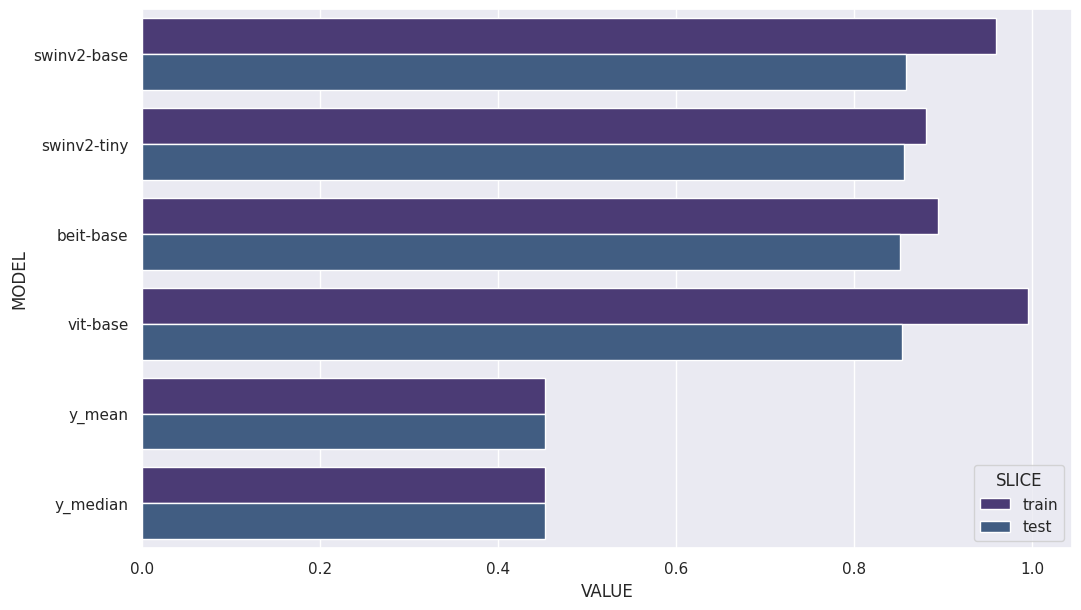

In [150]:
filtered=res[(res["SLICE"]!="total") & (res["METRIC"]=="ACCURACY")]
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="SLICE", orient="h", ax=ax)

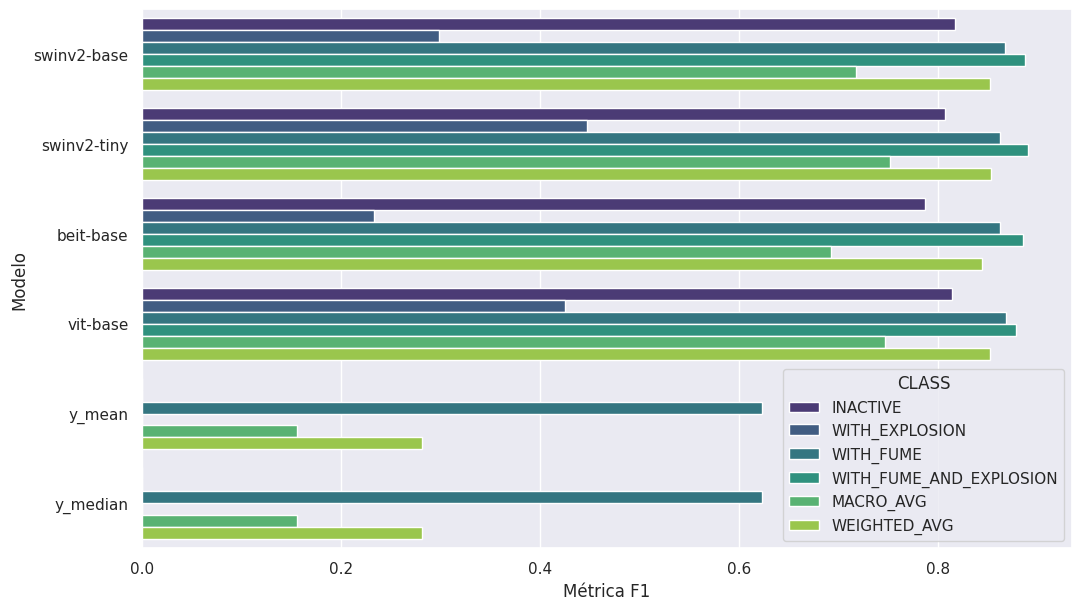

In [151]:
plot_metric("F1-SCORE", "Métrica F1")
plt.savefig("metrics/f1_global.png")
plt.show()

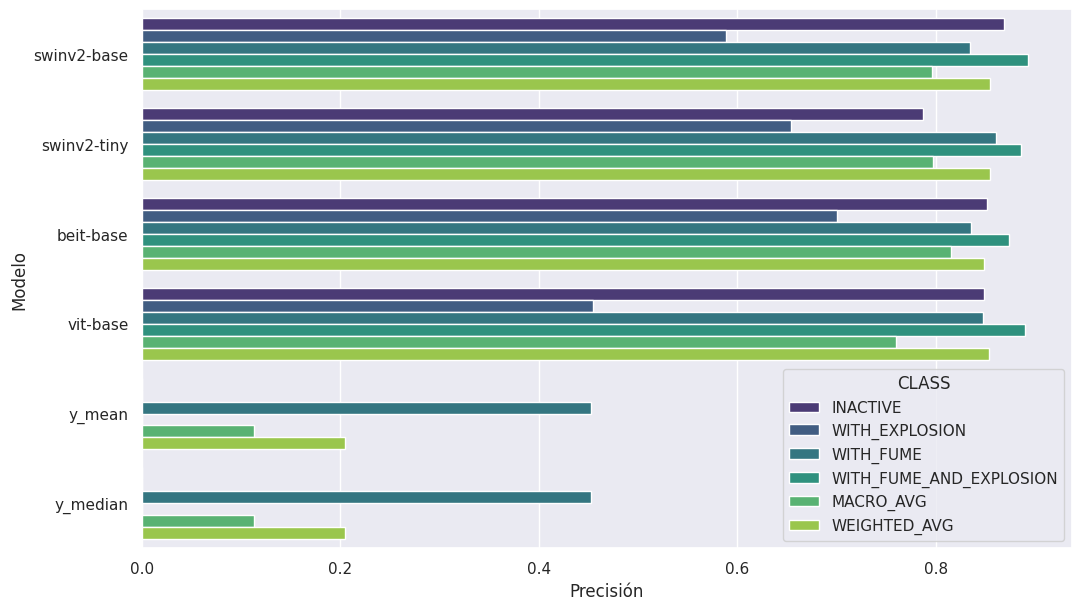

In [152]:
plot_metric("PRECISION", "Precisión")
plt.savefig("metrics/precision_global.png")
plt.show()

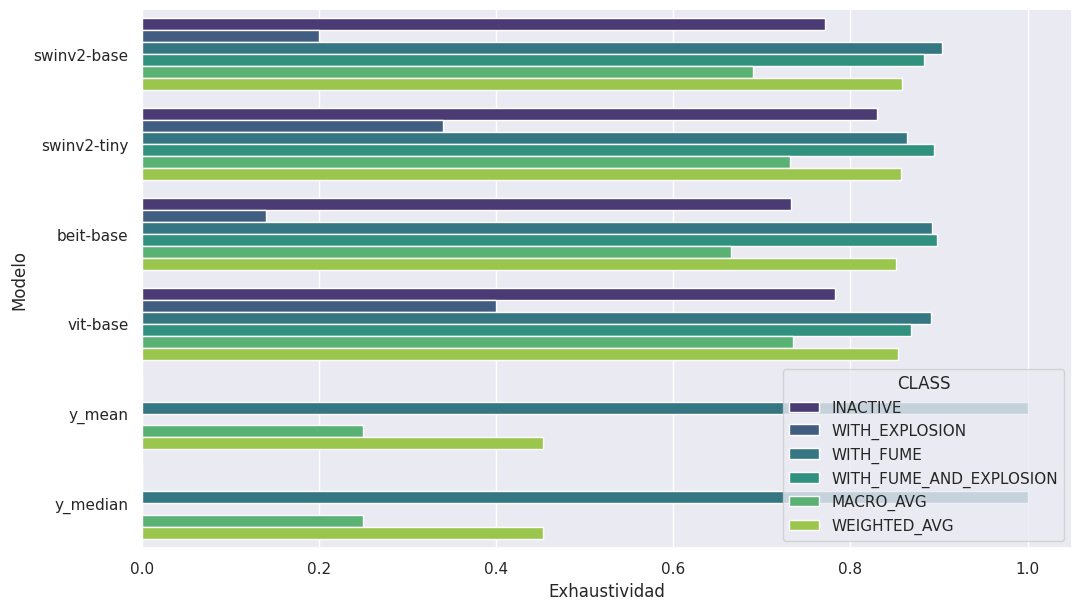

In [153]:
plot_metric("RECALL", "Exhaustividad")
plt.savefig("metrics/recall_global.png")
plt.show()

In [162]:

sns.set_theme(style="darkgrid",palette=sns.color_palette("cividis", 7))
def plot_model(model):
    filtered=res[(res["MODEL"]==model) & (res["SLICE"]=="test") & (res["METRIC"]!="SUPPORT")]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="METRIC", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    plt.xlabel("Valor")
    plt.ylabel("Métrica")
    plt.title(model)
    

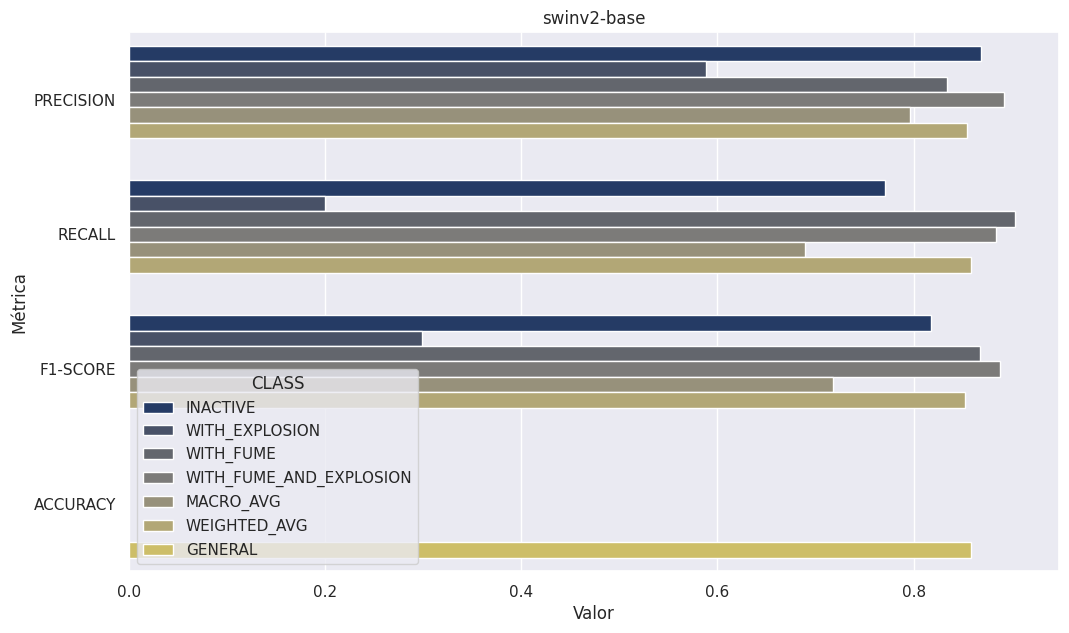

In [168]:
plot_model("swinv2-base")
plt.savefig("metrics/swinv2-base-metrics.png")
plt.show()

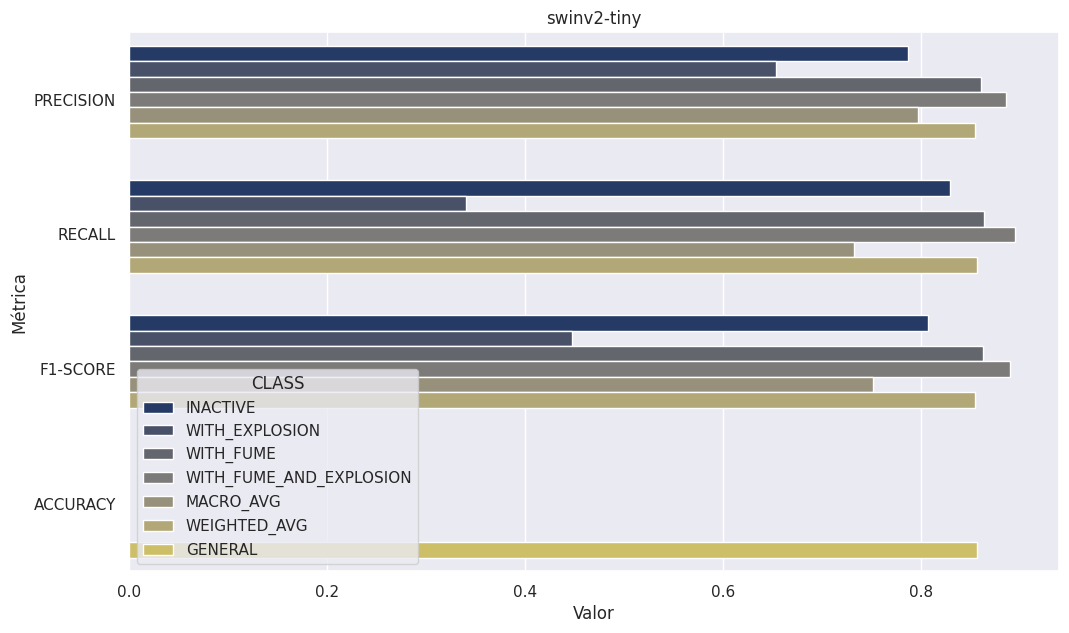

In [169]:
plot_model("swinv2-tiny")
plt.savefig("metrics/swinv2-tiny-metrics.png")
plt.show()

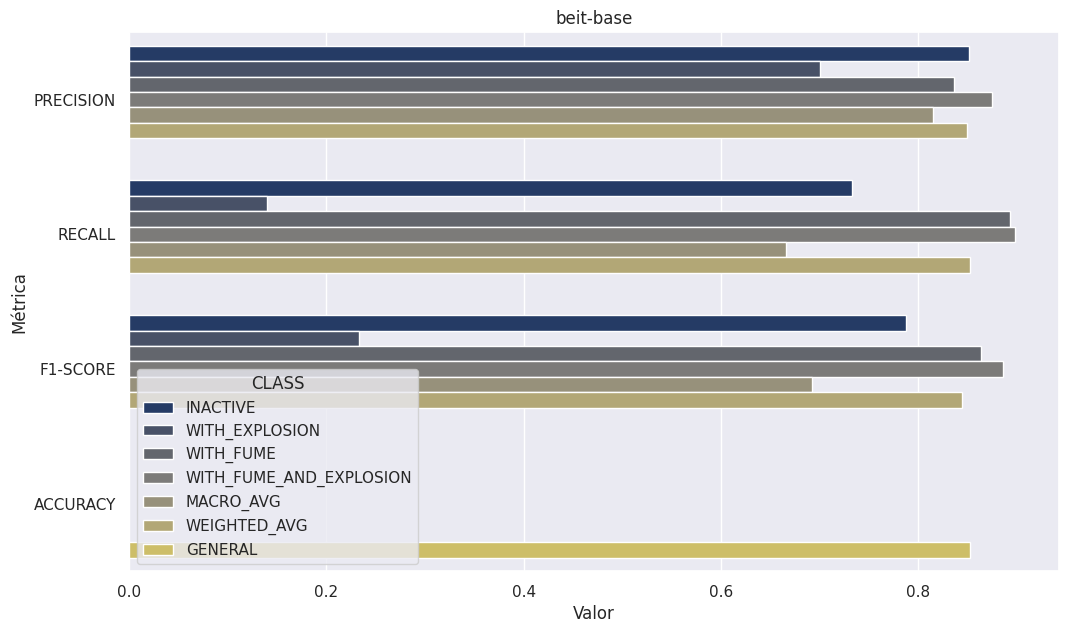

In [170]:
plot_model("beit-base")
plt.savefig("metrics/beit-base-metrics.png")
plt.show()

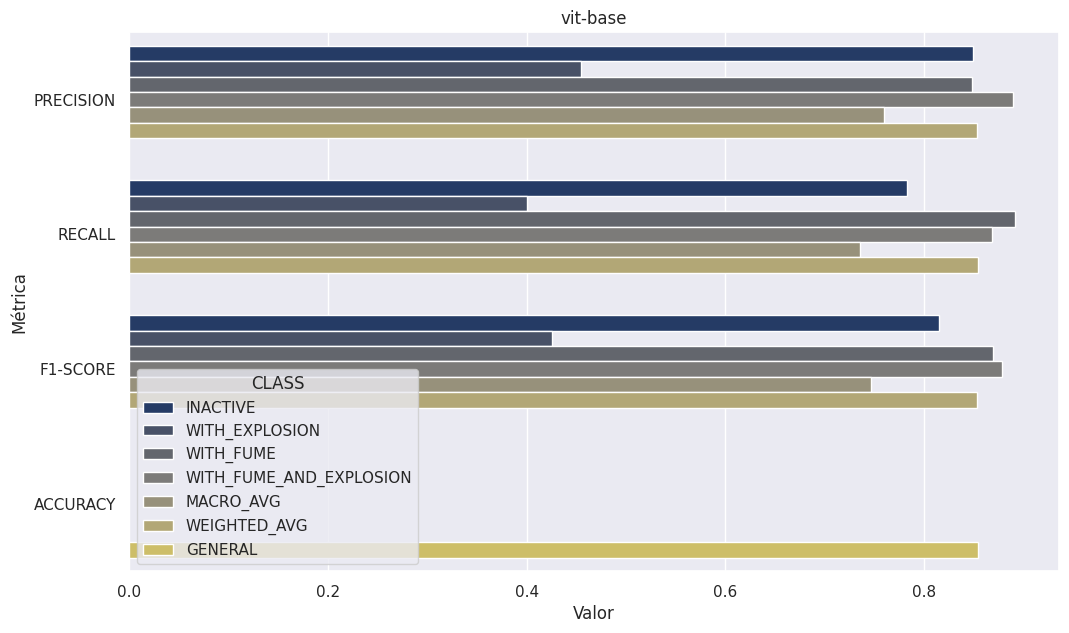

In [171]:
plot_model("vit-base")
plt.savefig("metrics/vit-base-metrics.png")
plt.show()